In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

/home/david/anaconda3/envs/ml_flow/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [9]:
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [11]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [62]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

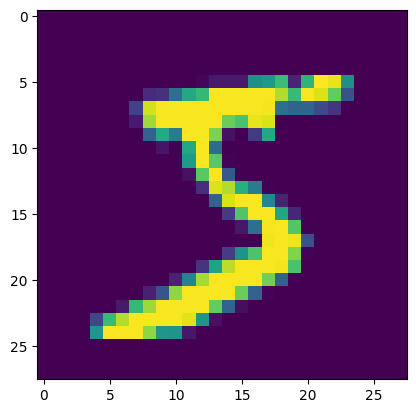

In [41]:
plt.imshow(x_train[0])

In [47]:
def normalize(img):
    return img/255.

In [48]:
print(np.max(x_train[0]))

255


In [49]:
x_train_normalized =  normalize(x_train[0])

In [54]:
print(np.max(x_train_normalized))

1.0


In [58]:
x_train_normalized =  normalize(x_train)
x_test_normalized =  normalize(x_test)

In [68]:
# How to find out how many categories are there? Lets look whats actually in the y_test

In [71]:
y_test[35]

2

In [72]:
# Its a categorical value. Let's have fun with numpy and get a random sample to get a better idea 

In [74]:
np.random.choice(y_test, 10)

array([4, 9, 5, 6, 8, 8, 5, 6, 8, 4], dtype=uint8)

In [75]:
# categories are seemingly denoted by a category number, but just to be sure what possibilities we can find...

In [76]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [77]:
# ok its values from 0, to 9. Is the distribution at least somewhat balanced?

In [78]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [ ]:
# kiiinda, there's a cca 20 % imbalance between the most used category and least. It should be fine, but if we are going to be 

In [90]:
y_test = to_categorical(y_test, np.max(y_test)+1)
y_train = to_categorical(y_train, np.max(y_train)+1)

In [91]:
tf.keras.layers.Conv2D()

array([0., 1.], dtype=float32)